# Анализ рынка игровой индустрии.

## Изучений общей информации.

In [1]:
#выгружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В таблице видны пропуски данных. Также названия колонок записаны в некорректном регистре.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как было отмечено ранее в таблице имеются пропуски. Колонку Year_of_Release можно было быпревести к формату datatime, однако в данном случае это будет лишнее действие, так как кроме года другой информации нет. Колонку User_Score надо преобразовать в формат float64.

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:** Предварительно подозрительных значений пока что не видно. В продажах имеются 0 минимальные значения. Возможно игра не продавалась в определеном регионе, а возможно она не была и вовсе выпущена. В целом датасет представлен наглядно, однако необходимо провести ряд подготовительных действий для его дальнейшего изучения.

## Подготовка данных

### Меняем названия столбцов

In [5]:
#меняем названия столбцов. Методом rename
data.rename(columns ={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}, inplace = True)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразовываем данные

In [6]:
# преобразовываем данные в колонке с оценкой пользователей
# ранее упоминалось что в этой колонке есть значения 'tbd', что в целом подразумевает под собой пропуск.
#чтобы преобразовать эту колонку данные значения можно привести к NaN
data['user_score'] = data['user_score'].replace('tbd')
data['user_score']= pd.to_numeric(data['user_score'])

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [8]:
#займемся обработкой пропусков
#name и genre содержат всего 2 пропуска. этими данными можно пренебресь удалим их из датасета
data = data.dropna(subset=['name']).reset_index(drop=True)
data = data.dropna(subset=['genre']).reset_index(drop=True)

In [9]:
# имеются пропуски в колонке с годом, оценим их количество
data['year_of_release'].isna().sum()/len(data)

0.016095255190570215

Количество  1,6% отбрасывать год не будем, в тоже время количество пропусков мало и несильно должно повлиять на результаты анализа. Заменить тоже не можем, так как замена средней/медианой по такому параметру некорректнa. 

Тоже самое касается оценок критикой и пользователей, рейтинг их большое количество в датасете и заменить на средние будет тоже некорректно, учитывая субьективность параметра. 


In [10]:
# пропуски по годам возможно связаны с тем, что игра не выходила вовсе. Проверим это и сделаем срез
data.query('year_of_release=="NaN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Подтверждить мысль не удалось. Пропуски по годам скорее всего имеют случайную природу (ошибки или забыли указать в источнике год).

В названиях некоторых игр стоят года, можно было бы применить лемматизация,но данный способ не поможет, так как не все игры выходили в год названия и не все игры с пропусками по году имеют в названии год.


### Расчитываем общие число продаж

In [11]:
#добавим колонку с общим числом продаж
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [12]:
# проверим игры с 0 продажами
data.query('total_sales==0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16674,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16707,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


Таких оказалось единицы. Пропуски не связаны с чем то конкретным, во всяком случае по представленным данным нельзя что-то выявить конкретное, скорее всего пропуски образовались из-за отсуствия данных на сайтах источниках, либо,например, игра была так мало раз продана, что никто не ставил оценок (если рассматривать пропуски по рейтингам).

In [13]:
# проверим дату на явные дубликаты
data.duplicated().sum()

0

**Вывод:** Данные обработаны. Колонки переименованны, значения столбцов приведены в нужные форматы. Пропуски изучены. Замен не потребовалось, так как учитывая характер пропущенных данных корректной замены найти нельзя, пропуски либо относятся к субьективны, либо к строгим данным, которые заменить просто так некорректно (как год выпуска).

## Исследовательский анализ.

### Количество игр в разные периоды

In [14]:
# сгруппируем данные по годам
data_group_yeargame= data.pivot_table(index='year_of_release', values ='name', aggfunc='count')
data_group_yeargame

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


Из группировки видно, что был сильный всплеск с 2006-2011 количества игр. До 1995 в целом выпуск игр был не так развит, как в последующие года. Выпуск игр с этого периода увеличивался в несколько раз. Для наглядности и подтверждения сказанного построим график.

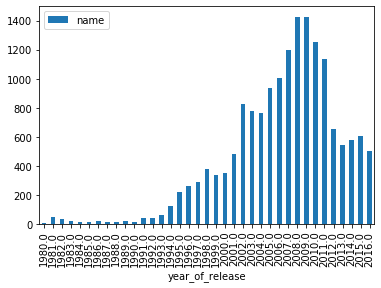

In [15]:
data_group_yeargame.plot(kind='bar')

Из графика видно, что игры в целом имели тенденцию к скачнообразному росту. Возможно, данные события связаны с появлением каких то модных тенденций (новые платформы или новые жанры игр), что вызывало резкий всплеск количества, а затем временное угасание до нового ноу-хау в игровой индустрии.

### Изучаем данные по игровым платформам

In [16]:
# изучим данные по игровым платформам, но сначала отбросим период до 1995
data_sinse1995=data.query('year_of_release>1994')

In [17]:
data_group_platform= data_sinse1995.pivot_table(index='platform', values ='total_sales', aggfunc='sum')
data_group_platform.sort_values(by='total_sales', ascending=False)


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


In [18]:
#Отберем только те платформы, чьи продажи превыли 100 млн копий и посмотрим их распределение по годам.
platform_over100 =data_group_platform.query('total_sales>100').index


def datanew(platform):  
    if platform in platform_over100:
        return "yes"
    else:
        return "no" 


data['sales_over100'] = data['platform'].apply(datanew)
data_sinse1995=data.query('year_of_release>1994')
newdata = data_sinse1995.query('sales_over100 == "yes"')
newdata

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_over100
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,yes
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,yes
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,yes
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,yes
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,yes
16707,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,yes
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,yes
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,yes


In [19]:
group_platform_year = newdata.pivot_table(index='year_of_release', columns='platform',values ='total_sales', aggfunc='sum')
group_platform_year

platform,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
1995.0,NaN,NaN,3.60,NaN,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,36.03,NaN,NaN,34.10,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,6.37,NaN,NaN,39.50,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,26.90,NaN,NaN,49.24,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,38.00,NaN,NaN,57.87,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000.0,NaN,NaN,19.76,0.07,NaN,33.97,4.66,96.37,39.17,NaN,NaN,NaN,NaN,NaN,0.99,NaN
2001.0,NaN,NaN,9.24,61.53,26.34,3.25,5.47,35.59,166.43,NaN,NaN,NaN,NaN,NaN,22.26,NaN
2002.0,NaN,NaN,NaN,74.16,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003.0,NaN,NaN,NaN,56.67,50.61,NaN,8.84,2.07,184.31,NaN,NaN,NaN,NaN,NaN,55.04,NaN


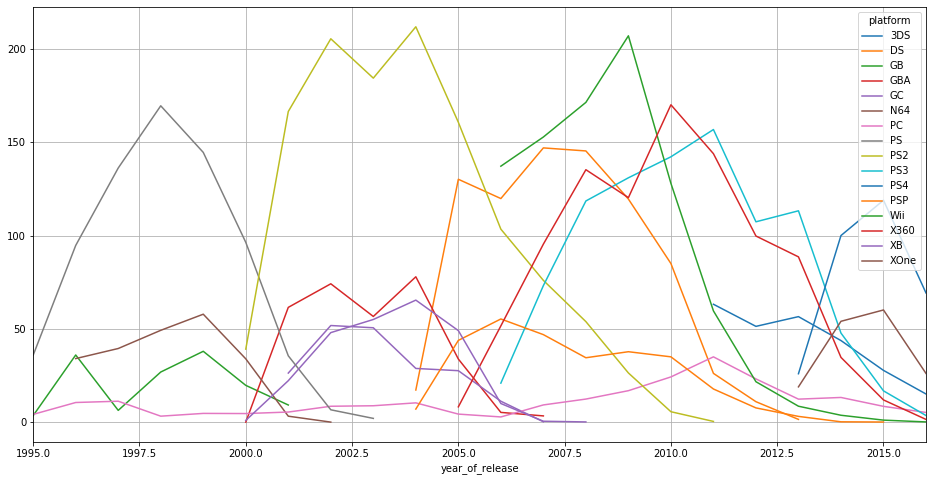

In [20]:
group_platform_year.plot(figsize=(16,8), grid=True)

По полученным данным видно, что у всех платформ есть одна общая тенденция. В среднем они пользуются популярностью 6-7 лет. Когда появляется новая платформа, происходит резкий всплеск продаж по ней. С последующем затухаем в течение 1-3 лет. Исключением является только PC, которая в течение всех лет имеет стабильное развитие с небольшими всплесками, что сильно отличается от всех других платформ.

Также всплеск количества игр 2006-2011 тоже теперь обьясним в этот период много было введено новых платформ,что стало причиной этого всплеска.

In [21]:
#Ниже приведена средняя продолжительность сущесвтования платформ
duration= newdata.groupby('platform')['year_of_release'].unique()
for key, value in duration.items():
    print(key, len(value))
    



3DS 6
DS 10
GB 7
GBA 8
GC 7
N64 7
PC 22
PS 9
PS2 12
PS3 11
PS4 4
PSP 12
Wii 11
X360 12
XB 9
XOne 4


Как я упоминал выше выбросом является платформа PC. Исходя из графика и сводной таблице наиболее существенные значения по продажам около 6-7 лет, НО все таки по времени затухания многие платформы живут до 5 лет в среднем, что видно из полученных расчетов выше, речь идет прежде всего о популярных линейках платформ таких как PlayStation и Xbox.

### Выбираем актуальный период

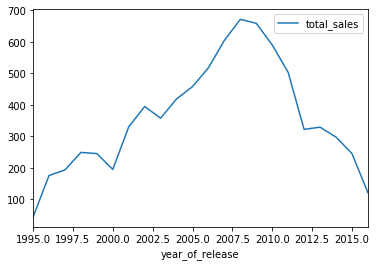

In [22]:
newdata.pivot_table(index='year_of_release', values ='total_sales', aggfunc='sum').plot()

Возьмем данные по всем платформам за последние 5 лет, чтобы выявить последние тенденции, то есть какие платформы в ближайшем будущем стоит рассматривать. 

In [23]:
data_sinse2012=data.query('year_of_release>2011')
data_sinse2012.pivot_table(index='year_of_release', columns='platform',values ='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [24]:
#уберем из датасета платформы, по которым за последний не было продаж. Учитывая их количество, можно убрать их вручную
actual_data=data_sinse2012.query('platform !=["DS","PS2","PSP"]')

### Выбор потенциально прибольных платформ

In [25]:
# посчитаем количество продаж по платформам за указанный период и построим график на каждую из них
actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
Name: total_sales, dtype: float64

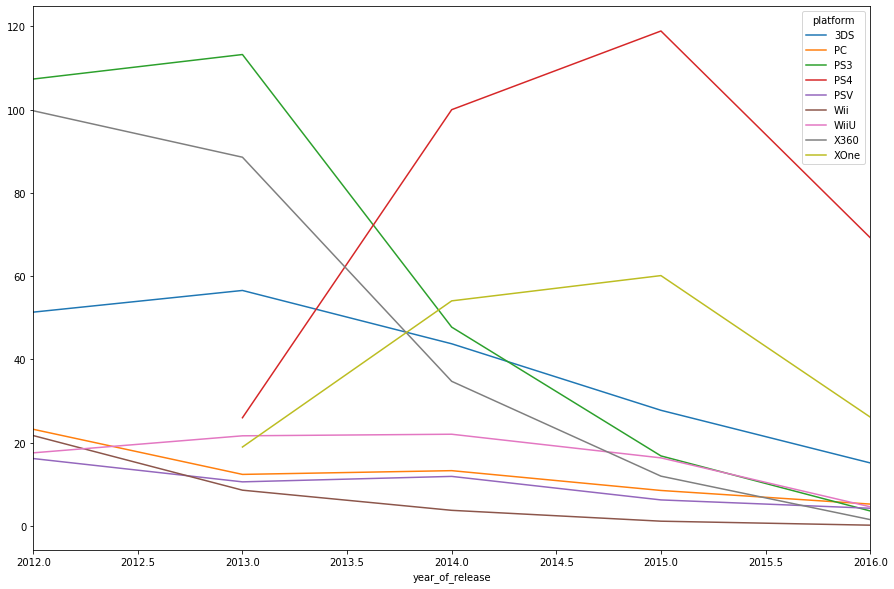

In [26]:
actual_data.pivot_table(index='year_of_release', columns='platform',values ='total_sales', aggfunc='sum').plot(figsize=(15,10))

По полученным данным видно, что сейчас идет общая тенденция к снижению.

Однако основываясь на предыдущих данных и теденциях можно выделить следующие потенциально прибыльные платформы:
- PS4 относительная новая платформа, которая еще точно задержится пару лет на рынке и имеющая самый высокий показатель продаж
- XOne аналогично PS4 только количество продаж ниже
- 3DS тоже можно еще один год уделить внимание
- PC данная платформа стабильна, сейчас переживает спад, но глядя на предыдущие периоды, то явно будет тенденция к ее небольшому росту. Пика здесь не будет, эта данная платформа точно всегда имеет свой спрос

WiiU и PSV судя по продажам платформы для более узкой аудитории, как и PC, но в отличие от PC данные платформы уже на грани своей стагнации, если и рассматривать их то очень ограниченный тиражом в ближайший год.

PS3, Xbox360 и Wii не смотря на их ощутимые показатели, уже прошли свое развитие. Есть вероятность, что в следующем году их не будет вовсе. Игры для данных платформ закупать не стоит.

### Построение диаграммы размаха по глобальным продажам

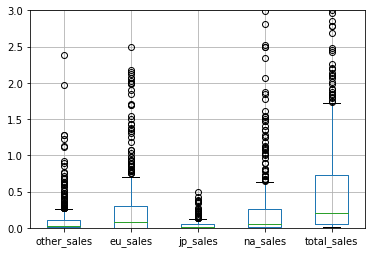

In [27]:
actual_data_for_box = actual_data[['platform','other_sales','eu_sales','jp_sales', 'na_sales', 'total_sales']]
actual_data_for_box_PS4 = actual_data_for_box.query('platform == "PS4"') 


plt.ylim(0, 3)

actual_data_for_box_PS4.boxplot()


Необходимо убрать слишком маленькие значения, иначе слишком много выбросов выходит. Оберем значения по общим продажам которые больше либо равны 0,5.



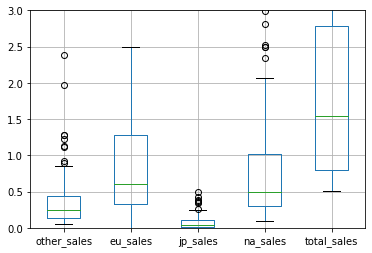

In [28]:
actual_data_for_box = actual_data_for_box.query('total_sales >= 0.5')
actual_data_for_box_PS4 = actual_data_for_box.query('platform == "PS4"') 
plt.ylim(0, 3)
actual_data_for_box_PS4.boxplot()

По PS4 платформе видно, что наибольшие количество продаж оказалось в европейский и североамериканском регионах. Имеется куча выбросов, что нормально для данной индуствии, так как зачастую отдельных игры формируют основные продажи.

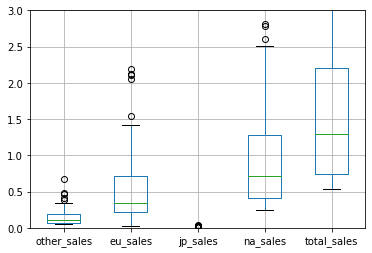

In [29]:
actual_data_for_box_XOne = actual_data_for_box.query('platform == "XOne"') 
plt.ylim(0, 3)
actual_data_for_box_XOne.boxplot()

По XOne платформе видно, что наибольшие количество продаж в североамериканском регионе. Имеются выбросы, но уже гораздо меньше чем у PS4. В Японсокм регионе практически нет данной платформы.

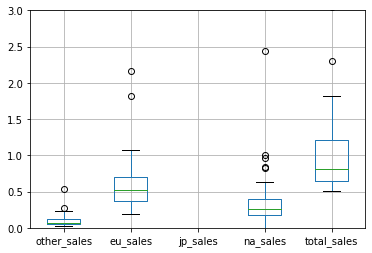

In [30]:
actual_data_for_box_PC = actual_data_for_box.query('platform == "PC"') 
plt.ylim(0, 3)
actual_data_for_box_PC.boxplot()

PC наибольшим спросом пользуется в европейской части. Выбросов здесь намного меньше по играм, чем у платформ описанных выше. В японсокй части данную платформу снова не жалуют.

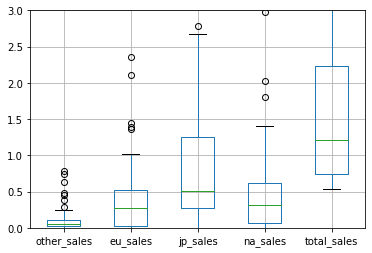

In [31]:
actual_data_for_box_3DS = actual_data_for_box.query('platform == "3DS"') 
plt.ylim(0, 3)
actual_data_for_box_3DS.boxplot()

Данная платформа имеет наибольший спрос в Японии. Довольно много выбросов в других регионах мира. Такие разницы по регионам вызваны тем, что Япония сама по себе является на текущий момент производителем и разработчиком половины существующих платформ, поэтому в ней некоторые платформы-аналоги других стран не пользуются спросом, да и смысла импортирования и закупок других платформ нет. У Японии также свой менталитет, а собственно спрос бывает на определенные типы игр. Пользователи же других регионов имеют более обширную аудитории и охват, поэтому там пользуются значительным спросом разные виды платформ в том числе, те которые имеют успех и в Японии.

###  Анализ взаимосвязи между продажами и отзывами

In [32]:
# подготовим таблицу для данного анализа и сразу убирем из нее пропуски по отзывам
actual_data_for_scatter = actual_data[['platform','user_score','critic_score','total_sales']]
actual_data_for_scatter =actual_data_for_scatter.dropna(subset=['user_score']).reset_index(drop=True)
actual_data_for_scatter =actual_data_for_scatter.dropna(subset=['critic_score']).reset_index(drop=True)
actual_data_for_scatter

,platform,user_score,critic_score,total_sales
0,PS3,8.2,97.0,21.05
1,X360,8.1,97.0,16.27
2,PS3,5.3,83.0,13.79
3,X360,4.8,83.0,13.68
4,PS4,8.3,97.0,12.62
...,...,...,...,...
1297,X360,2.1,49.0,0.01
1298,XOne,8.2,63.0,0.01
1299,WiiU,8.5,81.0,0.01
1300,XOne,6.7,74.0,0.01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f098233c390>,
      dtype=object)

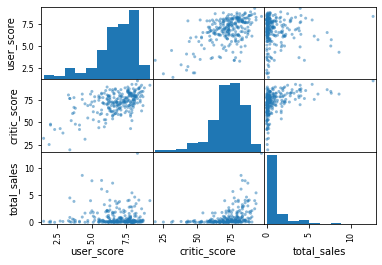

In [33]:
# рассмотрим взаимосявязь на наиболее популярной и потенциально прибыльной платформе PS4
actual_data_for_scatter_PS4 = actual_data_for_scatter.query('platform == "PS4"') 
pd.plotting.scatter_matrix(actual_data_for_scatter_PS4)

Как видно из графиков отзывы критиков влияют намного сильнее, чем отзывы пользователей. Там где отзывы были выше 75 были явные выбросы по продажам. Отзывы пользователей тоже влияют однако не так сильно как критики. Разные оценки имеют примерно одинаковое распределение выбросов без ярко выраженного уклона.

In [34]:
#изучим корреляцию
actual_data_for_scatter_PS4.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.556037,-0.028835
critic_score,0.556037,1.000000,0.406002
total_sales,-0.028835,0.406002,1.000000


Согласно коэффицентам корреляции отзывы пользователей не влияют на продажи игр. Отзывы критиков оказывают среднее влияние, видимо пользователи привыкли полагаться на свой вкус по большей части в этом сигменте и мало доверяют оценкам. Либо учитывая, что изначально было много пропусков по отзывам, то данное исследование может быть не вполне корректно.

### Сравнение выводов с другими платформами

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f098203cad0>,
      dtype=object)

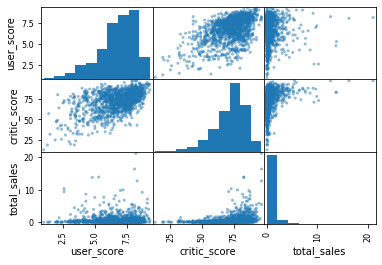

In [35]:
# построим матрицу рассеивания и корреляцию по выбраным ранее платформам
pd.plotting.scatter_matrix(actual_data_for_scatter)

In [36]:
actual_data_for_scatter.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.516181,0.003810
critic_score,0.516181,1.000000,0.307564
total_sales,0.003810,0.307564,1.000000


Здесь аналогичные результаты исходя из полученных данных, оценки не окзывают непосредственного влияния на продажи. Люди склонны доверять мнению критиков больше, когда как на оценки пользователей смотрят мало.

### Анализ игр по жанрам

In [37]:
# сгруппируем данные жанров 
actual_data.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum').sort_values(by='genre')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,
Action,45.49,13.14,115.75,96.10,16.33,10.75,19.07,81.60,37.31
Adventure,4.30,0.87,6.09,6.34,3.79,0.19,0.17,3.27,2.68
Fighting,8.46,0.12,11.00,8.65,2.21,NaN,6.27,4.97,2.45
Misc,9.45,0.73,8.88,8.19,4.32,17.86,12.46,14.83,7.43
Platform,19.11,0.14,4.26,7.69,2.26,2.25,21.53,2.14,0.93
Puzzle,2.66,0.03,0.04,0.02,0.06,0.66,1.32,NaN,NaN
Racing,0.28,1.23,11.56,12.14,2.21,0.01,7.87,8.41,9.79
Role-Playing,79.30,13.65,22.62,28.99,12.05,1.06,2.89,9.80,10.55
Shooter,0.13,14.27,60.39,88.56,2.34,NaN,6.01,72.70,60.33


Одназначными лидерами становятся следующие жанры: 
- Action
- Shooter
- Role-Playing
- Sports

Наименне популрными становятся жанры Puzzle, Strategy и Simulation.

Также по полученному распределению видно, что некоторые жанры явно преобладат на определенных платформах. К примеру, почти половина продаж по Role-Playing приходится на 3DS, а жанр Platform распределен практически весь между 3DS и WiiU.


**Вывод:** по результатам проведенного анализа можно сделать следующие выводы:
- Значительный рост у игр начался с конца 90-ых годов. 
- В целом продажи игр развиваются скачкообразно. Данная тенденция зависит от выхода новых игровых платформ, которые в среднем живут около 6 лет и сменяются затем другими. Исключением является только PC, которое имеет стабильное не сильно подверженное скачкам развитие со вомими ростами и падениями.
- Для прогноза на будущее был выбран период 5 лет. Были выявлены потенциально прибыльные платформы на следующий год: PC, XOne, PS4 и 3DS.
- В целом в игровой индустрии много выбросов по играм. Разные платформы пользуются разным спросом в различных частях света.
- Согласно анализу отзывы пользователей не влияют на продажи, а отзывы критиков оказывают умеренное влияние, полагаясь на полученные данные (возможно в дате было мало данных).
- Наиболее популярные жанры Action, Shooter, Role-Playing и Sports. Также у некоторых платформ некоторые жанры имеют подавляюие большинство, что говорит об уникальности некоторых игр.

## Составление портрета пользователя каждого региона

In [38]:
#сгрупируем данные по платформам в разрезе изучаемых регионов (NA,EU,JP) за анализируммый актуальный период

display(actual_data.pivot_table(index='platform', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False))
display(actual_data.pivot_table(index='platform', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False))
actual_data.pivot_table(index='platform', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31
PC,37.76,0.00,19.12
WiiU,25.13,13.01,38.10
Wii,11.92,3.39,17.45
PSV,11.36,21.04,10.98


,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
PS3,106.86,35.29,103.38
PSV,11.36,21.04,10.98
PS4,141.09,15.96,108.74
WiiU,25.13,13.01,38.10
Wii,11.92,3.39,17.45
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12
PC,37.76,0.00,19.12


,eu_sales,jp_sales,na_sales
platform,,,
X360,74.52,1.57,140.05
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31
WiiU,25.13,13.01,38.10
PC,37.76,0.00,19.12
Wii,11.92,3.39,17.45
PSV,11.36,21.04,10.98


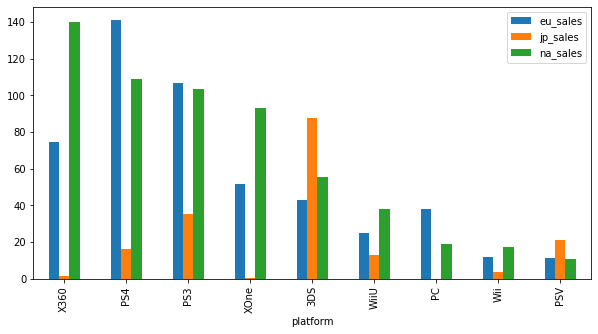

In [39]:
# Постоим график к полученным результатам
actual_data.pivot_table(index='platform', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(10,5))


В европейском регионе за последние 5 лет большей популярностью пользовались платформы PS4 и PS3, следом X360 и XOne, 3DS.

У серевороамерикоснкого региона аналогичная позиция с разницей только в том, что лидером там стало X360, что не удивительно так как платформа xbox родом из Америки, но все равно платформы PS пользуются большим спросом, как и в Европе.

Что касается японского региона то здесь лидерами становятся только платформы японского происхождения, тогда как платформы серии xbox и pc практически не пользуются спросом.

In [40]:
#сгрупируем данные по жанрам в разрезе изучаемых регионов (NA,EU,JP) за анализируммый актуальный период
display(actual_data.pivot_table(index='genre', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False))
display(actual_data.pivot_table(index='genre', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False))
actual_data.pivot_table(index='genre', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
genre,,,
Action,158.43,49.18,177.00
Shooter,113.47,9.23,144.77
Sports,68.84,6.98,81.38
Role-Playing,46.76,59.12,60.65
Racing,27.29,2.50,17.22
Misc,25.95,12.45,38.13
Platform,20.98,8.63,25.17
Simulation,14.47,10.35,7.86
Fighting,10.79,9.08,19.79


,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,46.76,59.12,60.65
Action,158.43,49.18,177.00
Misc,25.95,12.45,38.13
Simulation,14.47,10.35,7.86
Shooter,113.47,9.23,144.77
Fighting,10.79,9.08,19.79
Platform,20.98,8.63,25.17
Sports,68.84,6.98,81.38
Adventure,9.41,6.56,8.92


,eu_sales,jp_sales,na_sales
genre,,,
Action,158.43,49.18,177.00
Shooter,113.47,9.23,144.77
Sports,68.84,6.98,81.38
Role-Playing,46.76,59.12,60.65
Misc,25.95,12.45,38.13
Platform,20.98,8.63,25.17
Fighting,10.79,9.08,19.79
Racing,27.29,2.50,17.22
Adventure,9.41,6.56,8.92


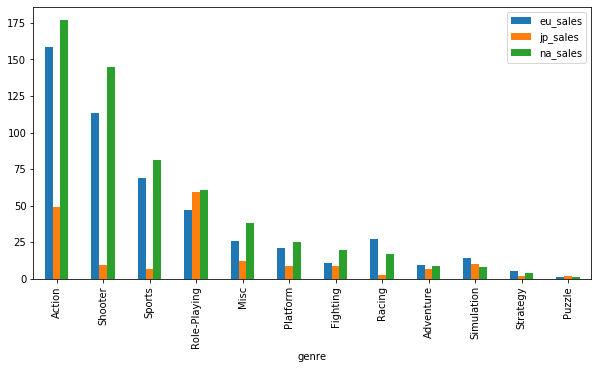

In [41]:
actual_data.pivot_table(index='genre', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,5))

Ситуация аналогична, тогда как в американском и европейском регионе предпочитают примерно аналогичные жанры Action, Shooter, Sports, Role-Playing,  разве что, в Америке менeе популярен жанр Racing, который в Европе замыкает топ-5 за изучаемый период, то в Японии лидерами становится Role-Playing, Action, Misc, Simulation и Shooter. 

In [42]:
# проверим количевто пропусков по рейтингу в нашей актуальной дате
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 16 to 16712
Data columns (total 13 columns):
name               2682 non-null object
platform           2682 non-null object
year_of_release    2682 non-null float64
genre              2682 non-null object
na_sales           2682 non-null float64
eu_sales           2682 non-null float64
jp_sales           2682 non-null float64
other_sales        2682 non-null float64
critic_score       1310 non-null float64
user_score         1571 non-null float64
rating             1589 non-null object
total_sales        2682 non-null float64
sales_over100      2682 non-null object
dtypes: float64(8), object(5)
memory usage: 293.3+ KB


In [51]:
#сгрупируем данные по рейтингу ESRB в разрезе изучаемых регионов (NA,EU,JP) за анализируммый актуальный период
display(actual_data.pivot_table(index='rating', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False))
display(actual_data.pivot_table(index='rating', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False))
actual_data.pivot_table(index='rating', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)

,eu_sales,jp_sales,na_sales
rating,,,
M,193.96,21.20,231.57
E,111.79,27.62,113.44
unknown,89.32,95.62,100.13
E10+,54.84,8.19,75.09
T,52.96,25.76,66.02


,eu_sales,jp_sales,na_sales
rating,,,
unknown,89.32,95.62,100.13
E,111.79,27.62,113.44
T,52.96,25.76,66.02
M,193.96,21.20,231.57
E10+,54.84,8.19,75.09


,eu_sales,jp_sales,na_sales
rating,,,
M,193.96,21.20,231.57
E,111.79,27.62,113.44
unknown,89.32,95.62,100.13
E10+,54.84,8.19,75.09
T,52.96,25.76,66.02


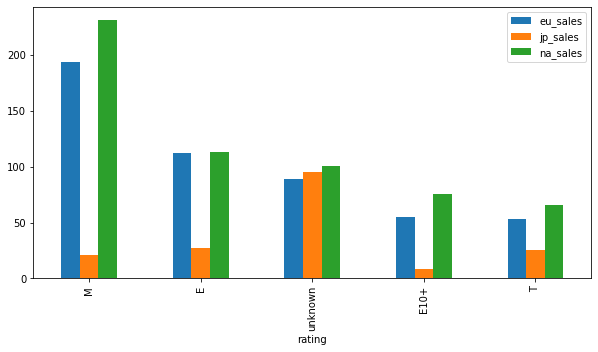

In [52]:
actual_data.pivot_table(index='rating', values =['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,5))

Европа и северная Америка снова похожи наиболее популярны игры из со взрослым рейтингом, затем идут игры с категорией для всех, для всех старше 10 и подростков. Но стоит отметить, что половина продаж приходит на игры для взрослых и в том регионе и в том. 

В Японии же свои правила, лидером являются игры с рейтингом для всех, затем идут подростки и только потом уже взрослые. Хотя в целом разница между этими категориями не сильно велика. Все таки рейтинги в Японии оказывают меньшее влияние, чем в других регионах.

**Вывод:** рынки северной Америки и Европы в целом аналогичны друг другу, что в целом позволяет планировать продажи игр и в том и том регионе с небольшими отличаями. Рынок же Японии живет по своим правилам вкусы местных пользователей отличаются от других крупных рынков игровой индустрии.

## Проверка гипотез

### Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC 

In [53]:
# сформулируем гипотезы H0 - рейтинги одинаковые, H1 - рейтинги разные
# найдем средние для Xbox One 
XOne_mean = (actual_data.query('platform=="XOne"')['user_score']).dropna()
PC_mean = (actual_data.query('platform=="PC"')['user_score']).dropna()
#задаем уровень критичности 
alpha =0.05

# проверяем гипотезу

test = st.ttest_ind(PC_mean, XOne_mean)
if test.pvalue<alpha:
    print('H0 можно отвергнуть, оценки не равны')
else: 
    print('H0 нельзя отвергнуть, оценки равны')

H0 нельзя отвергнуть, оценки равны


In [54]:
print(test.pvalue)

0.5747220188229722


Согласно полученным результатам оценки данных платформ не особо различаются. Гипотезу H0 нельзя отвергнуть.

### Различаются ли средние пользовательские рейтинги жанров Action и Sports

In [55]:
# сформулируем гипотезы H0 - рейтинги одинаковые, H1 - рейтинги различаются
# найдем средние для Sports
Sports_mean = (actual_data.query('genre=="Sports"')['user_score']).dropna()
Action_mean = (actual_data.query('genre=="Action"')['user_score']).dropna()

# уровень критичности тотже проверяем гипотезу
test2 = st.ttest_ind(PC_mean, Sports_mean)
if test2.pvalue<alpha:
    print('H0 можно отвергнуть, оценки не равны')
else: 
    print('H0 нельзя отвергнуть, оценки равны')

H0 можно отвергнуть, оценки не равны


In [56]:
print(Sports_mean.mean())
Action_mean.mean()

5.5055555555555555


6.814285714285714

Согласно полученным результатам оценки данных жанров не равны. Гипотезу H0 можно отвергнуть. В целом глядя на средние двух выборок видно, что у жанра Action оценка скорее всего больше.

In [57]:
print(test2.pvalue)

7.46744130543638e-08


## Общий вывод

Учитывая полученные в ходе иследованния результаты, компании рекомендуется рассматривать для дальнейшего планирования следующие платформы PC, XOne, PS4 и 3DS. Стоит учесть, что у платформ есть цикличность и данные платформы (за исключением PC) скоро уйдут уже с рынка, так как в среднем платформы живут 6-7 лет, а указанные выше уже довольно давно на рынке, но на 2017 год в них еще будет интерес. 

Также стоит учитывать, что в плане продаж игры могут сильно отличаться. Оценки не дают точной информации о том какие игры обретут успех, если ориентироваться, то лучше смотреть на оценки критиков, а не пользователей (в полученных данных было много пропусков оценок, вывод сделан по полученным данным).

Самые популярные жанры по миру Action, Shooter, Role-Playing и Sports. Также некоторые жанры (среди указанных) выпускаются в основном под опеределенные платформы,что не мало важно при учете планирования продаж.

Если брать по географическому распределению, то рынки Америки и Европы имеют примерно схожие вкусы, если компания планирует работать на японском рынке, то следует учитывать местную специфику и вкусы покупателей.